In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [169]:
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [170]:
pd.options.display.float_format = '{:.2f}'.format 

# Loading the Lending Club Case Study

In [171]:
input = pd.read_csv("C://Users//Sairam//Downloads//loan//loan.csv",dtype=object)
input.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [172]:
input.shape

(39717, 111)

In [173]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


# Investigating Null Values

In [174]:
input.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [175]:
input.isnull().all(axis = 0).sum()

54

In [176]:
input.isnull().all(axis = 1).sum()

0

# Data Cleaning

In [177]:
input.drop(input.iloc[:, 53:105],inplace = True, axis  = 1)

In [178]:
input.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,0,NaN,1,INDIVIDUAL,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,0,NaN,1,INDIVIDUAL,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,0,NaN,1,INDIVIDUAL,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,0,NaN,1,INDIVIDUAL,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,0,NaN,1,INDIVIDUAL,0,0,NaN,NaN,NaN,NaN


In [179]:
column1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
input.drop(labels = column1, axis =1, inplace=True)





In [180]:
column2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
input.drop(labels = column2, axis =1, inplace=True)

In [181]:
column3 = ["member_id","url","emp_title","zip_code","tax_liens"]
input.drop(labels = column3, axis =1, inplace=True)

In [182]:
input.shape

(39717, 45)

In [183]:
input.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status 

In [184]:
column4 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
input.drop(labels = column4, axis =1, inplace=True)

In [185]:
input.emp_length.fillna('0',inplace = True)
input["emp_length"] = input.emp_length.str.extract('(\d+)')
input.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,B,B2,10,RENT,...,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,0
1,1077430,2500,2500,2500,60 months,15.27%,C,C4,1,RENT,...,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,0


In [186]:
print(input.pub_rec_bankruptcies.isnull().sum())

697


In [187]:
input.pub_rec_bankruptcies.fillna('Not Known',inplace = True)
print(input.pub_rec_bankruptcies.isnull().sum())

0


In [188]:
input['int_rate'] = input['int_rate'].str.rstrip('%')

input['revol_util'] = input['revol_util'].str.rstrip('%')

In [189]:
columns_Numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','emp_length','annual_inc','dti']
input[columns_Numeric] = input[columns_Numeric].apply(pd.to_numeric)

In [190]:
(input.loan_status.value_counts()*100)/len(input)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [191]:
(input.purpose.value_counts()*100)/len(input)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [192]:
input.issue_d = pd.to_datetime(input.issue_d, format='%b-%y')
input['year'] = input ['issue_d'].dt.year
input ['month'] = input ['issue_d'].dt.month
input.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,0,0,0,Jan-15,171.62,May-16,0,0,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,C,C4,1,RENT,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,0,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,C,C5,10,RENT,...,0,0,0,Jun-14,649.91,May-16,0,0,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,C,C1,10,RENT,...,16.97,0,0,Jan-15,357.48,Apr-16,0,0,2011,12
4,1075358,3000,3000,3000.00,60 months,12.69,B,B5,1,RENT,...,0,0,0,May-16,67.79,May-16,0,0,2011,12


# UNIVARIATE ANALYSIS

In [193]:
input['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

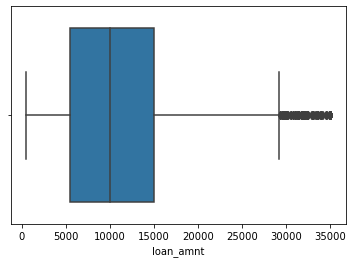

In [194]:
sns.boxplot(input['loan_amnt'])

In [195]:
input['total_pymnt'].describe()

count           39717
unique          37850
top       11196.56943
freq               26
Name: total_pymnt, dtype: object

<AxesSubplot:xlabel='loan_amnt'>

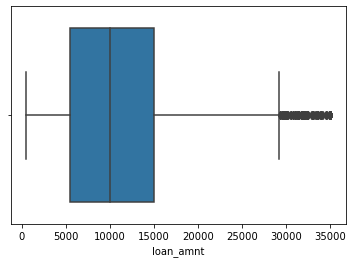

In [196]:
sns.boxplot(input['loan_amnt'])

# Outlier Treatment

# Before Removing Outliers

In [197]:
print(input['annual_inc'].describe())

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

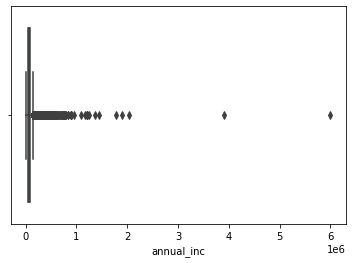

In [198]:
sns.boxplot(input['annual_inc'])

# After Removing Outliers

In [199]:
input = input[input['annual_inc']<input['annual_inc'].quantile(0.95)]

In [200]:
print(input['annual_inc'].describe())

count    37730.00
mean     61043.98
std      27795.21
min       4000.00
25%      40000.00
50%      56000.00
75%      78000.00
max     141996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

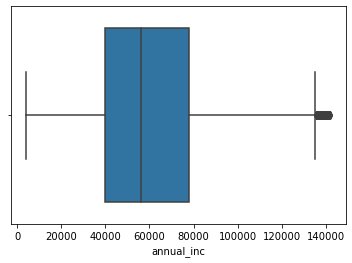

In [201]:
sns.boxplot(input['annual_inc'])

In [202]:
input['int_rate'].describe()

count   37730.00
mean       11.97
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

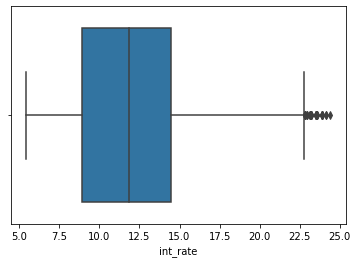

In [203]:
sns.boxplot(input['int_rate'])

# Distribution Plot

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

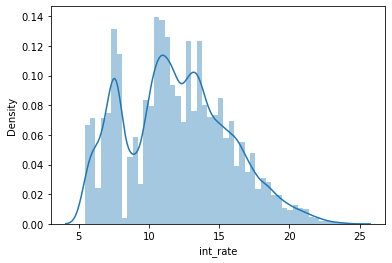

In [204]:
sns.distplot(input['int_rate'])

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

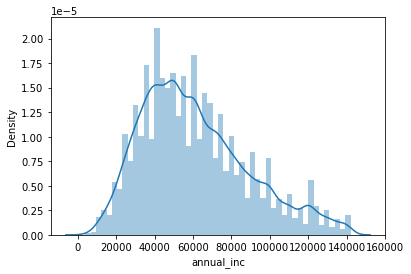

In [205]:
sns.distplot(input['annual_inc'])

<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

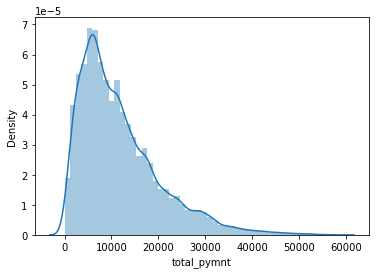

In [206]:
sns.distplot(input['total_pymnt'])

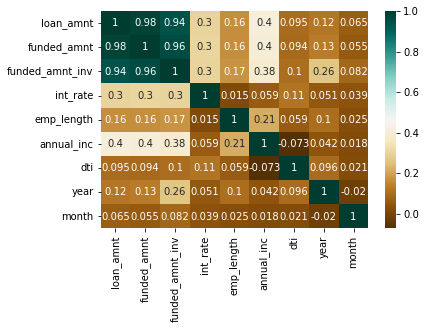

In [207]:
loan_correlation = input.corr()
sns.heatmap(loan_correlation,annot = True,cmap="BrBG")
plt.show()

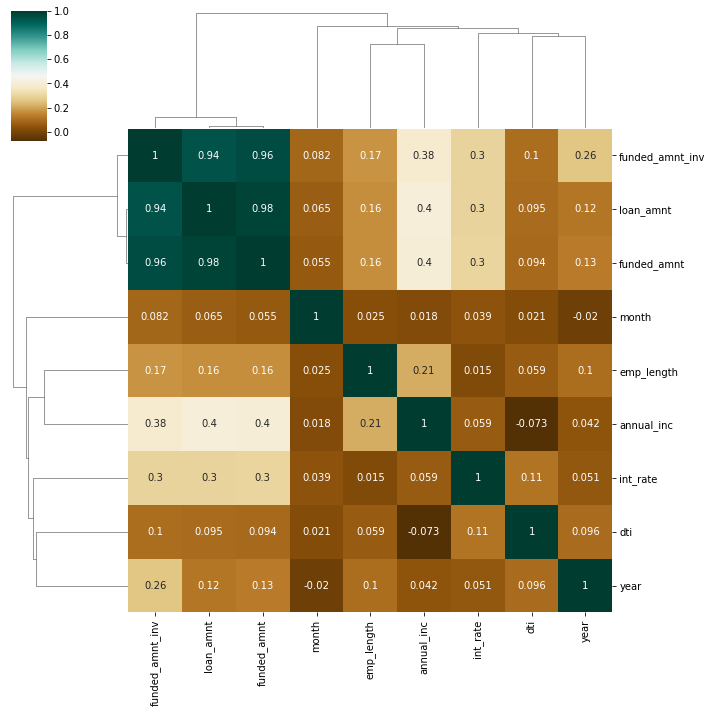

In [208]:
sns.clustermap(loan_correlation,annot = True,cmap="BrBG")
plt.show()

In [209]:
input['loan_amnt_cat'] = pd.cut(input['loan_amnt'],[0,5000,10000,15000,20000,25000,30000,35000],labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000+'])

input['annual_inc_cat'] = pd.cut(input['annual_inc'],[0,15000,30000,45000,60000,75000,90000,105000],labels = ['0-15000','15000-30000','30000-45000','45000-60000','60000-75000','75000-90000','90000+'])

input['int_rate_cat'] = pd.cut(input['int_rate'],[5,10,12.5,16,20],labels = ['5-10','10-12.5','12.5-16','16+'])

input['dti_cat'] = pd.cut(input['dti'],[0,5,10,15,20,25],labels = ['0-5','5-10','10-15','15-20','20+'])

In [210]:
input['loan_amnt_cat'].describe()

count          37730
unique             7
top       5000-10000
freq           12589
Name: loan_amnt_cat, dtype: object

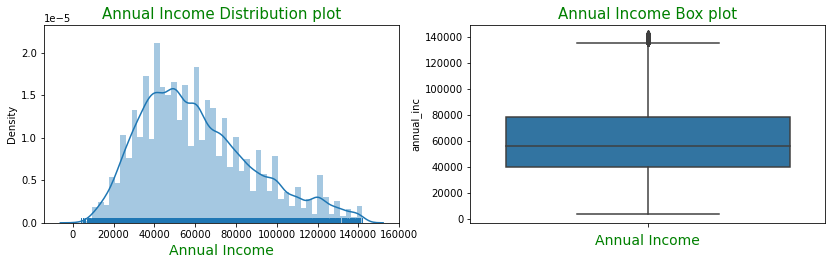

In [211]:
plt.figure(figsize=(14,8),facecolor='w')
plt.subplot(2,2,1)
ax = sns.distplot(input['annual_inc'],rug =True)
ax.set_title("Annual Income Distribution plot",fontsize=15,color='g')
ax.set_xlabel("Annual Income",fontsize=14,color='g')

plt.subplot(2,2,2)
ax = sns.boxplot(y = input['annual_inc'])
ax.set_title("Annual Income Box plot",fontsize=15,color='g')
ax.set_xlabel("Annual Income",fontsize=14,color='g')

plt.show()

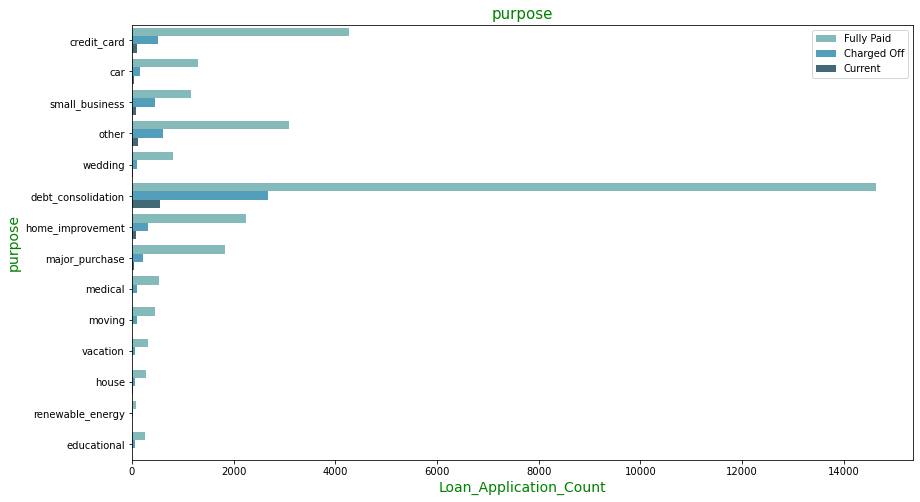

In [212]:
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.countplot(y = "purpose",data = input , hue = "loan_status",palette = "GnBu_d")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("purpose",fontsize=15,color='g')

ax.set_xlabel("Loan_Application_Count",fontsize=14,color='g')
ax.set_ylabel("purpose",fontsize=14,color='g')

plt.show()

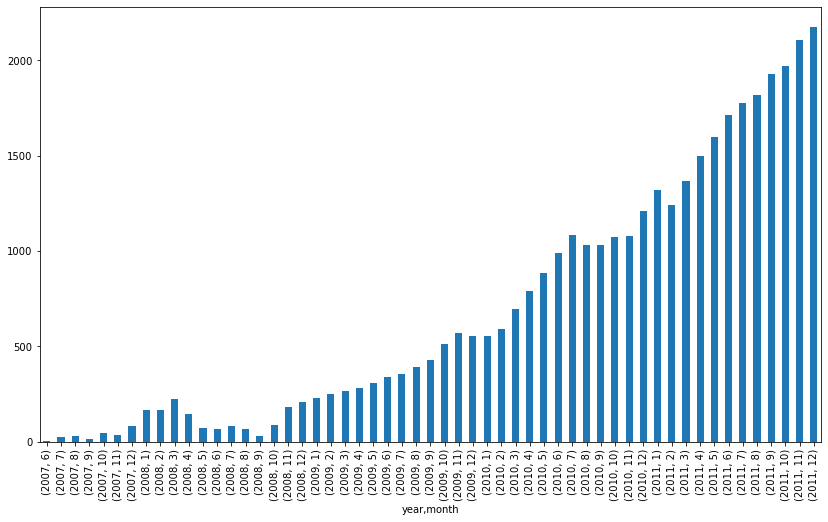

In [213]:
plt.figure(figsize=(14,8),facecolor='w')


input.groupby(['year','month']).id.count().plot(kind = 'bar')
ax.set_xlabel("Year,Month",fontsize=14,color='g')
ax.set_ylabel("Loan application Count",fontsize=14,color='g')
ax.set_title("Loan application count in years and months",fontsize=15,color='g')

plt.show()

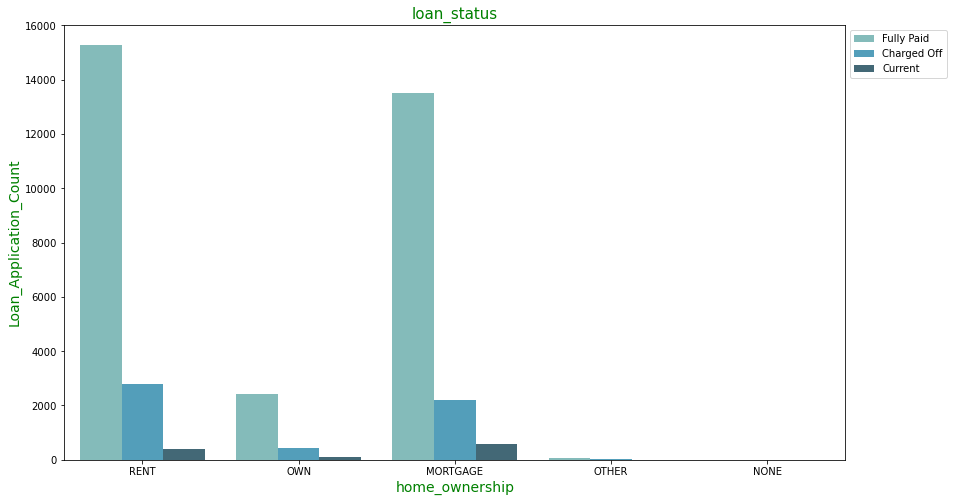

In [214]:
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.countplot(x = "home_ownership",data = input , hue = "loan_status",palette = "GnBu_d")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("loan_status",fontsize=15,color='g')

ax.set_xlabel("home_ownership",fontsize=14,color='g')
ax.set_ylabel("Loan_Application_Count",fontsize=14,color='g')

plt.show()

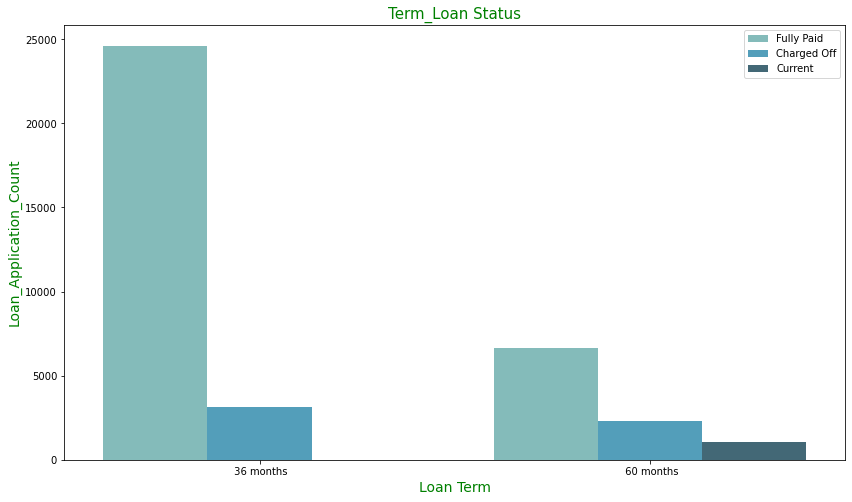

In [215]:
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.countplot(x = "term",data = input , hue = "loan_status",palette = "GnBu_d")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Term_Loan Status",fontsize=15,color='g')

ax.set_xlabel("Loan Term",fontsize=14,color='g')
ax.set_ylabel("Loan_Application_Count",fontsize=14,color='g')

plt.show()

In [216]:
interest_vs_loan = input.groupby(['int_rate_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cat,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16+,1192,331,3131,4654,0.26
2,12.5-16,1952,311,8983,11246,0.17
1,10-12.5,1196,255,7716,9167,0.13
0,5-10,812,75,11020,11907,0.07


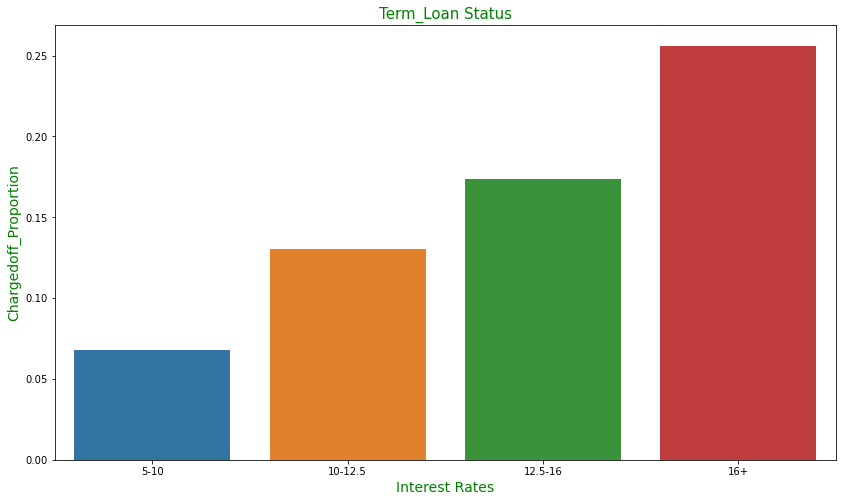

In [217]:
fig,ax1 =  plt.subplots(figsize=(14,8),facecolor='w')
ax1.set_title("Term_Loan Status",fontsize=15,color='g')
ax1 = sns.barplot(x = 'int_rate_cat', y = 'Chargedoff_Proportion',data = interest_vs_loan )
ax1.set_xlabel("Interest Rates",fontsize=14,color='g')
ax1.set_ylabel("Chargedoff_Proportion",fontsize=14,color='g')

plt.show()

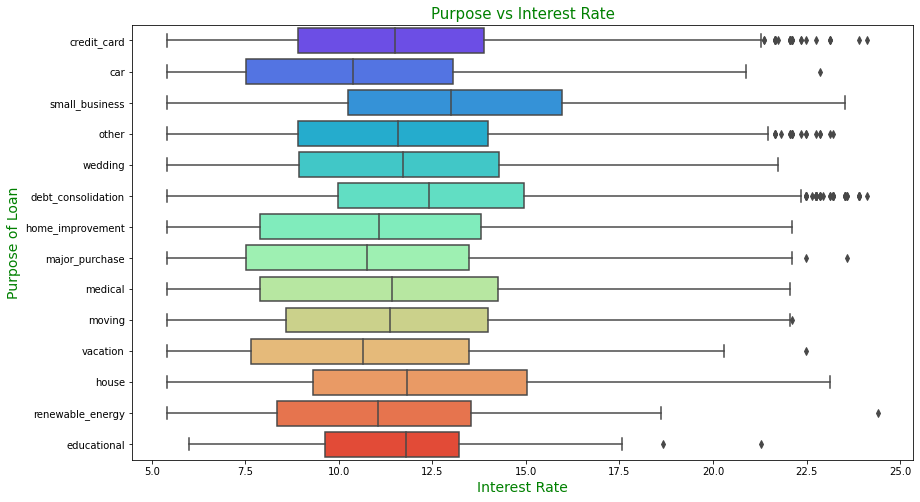

In [218]:
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(x='int_rate', y='purpose', data =input,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='g')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'g')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'g')
plt.show()

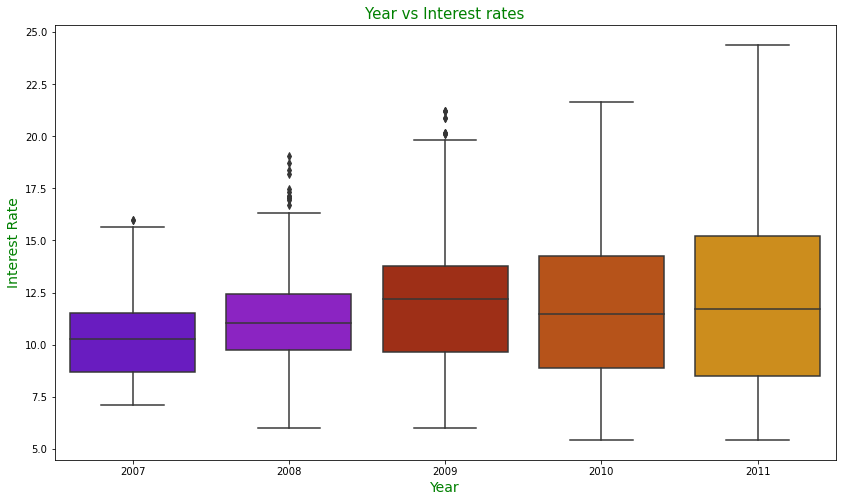

In [219]:
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(y='int_rate', x='year', data =input,palette='gnuplot')
ax.set_title('Year vs Interest rates',fontsize=15,color='g')
ax.set_xlabel('Year',fontsize=14,color = 'g')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'g')
plt.show()